In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

### Load the data

In [2]:
data = pd.read_csv('Country_clusters.csv')

In [3]:
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


## Plot the data

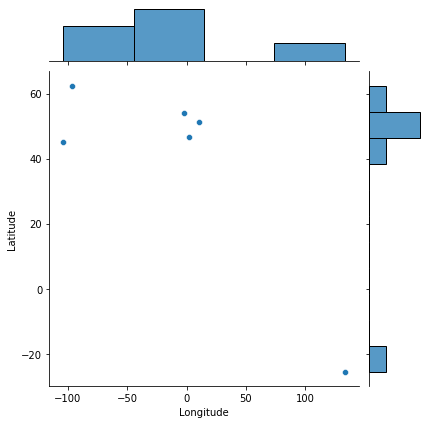

In [4]:
sns.jointplot(data=data,x='Longitude',y='Latitude')

## Select the features

In [5]:
x = data.iloc[:,1:3]


In [6]:
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


## Clustering

In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(3)

In [8]:
kmeans.fit(x)

KMeans(n_clusters=3)

## Clustering results

In [9]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([1, 1, 0, 0, 0, 2])

In [10]:
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters

In [11]:
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,1
1,Canada,62.40,-96.80,English,1
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,2


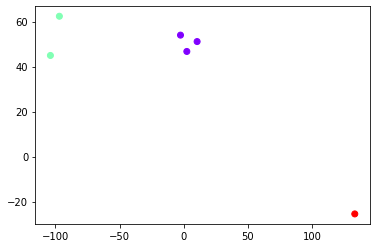

In [12]:
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Cluster'],cmap='rainbow')

# selecting the number of clusters



# WCSS

In [17]:
kmeans.inertia_

288.10523333333333

In [19]:
wcss=[]

for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [20]:
wcss

[42601.91356666667,
 13205.758119999999,
 288.10523333333333,
 111.91233333333332,
 38.50624999999998,
 0.0]

### The elbow Method

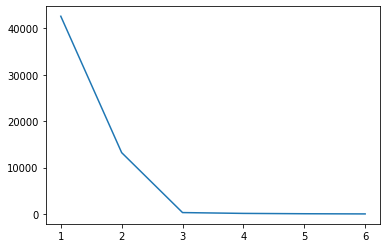

In [23]:
number_cluster = range(1,7)
plt.plot(number_cluster,wcss)

In [ ]:
!git add cluster1.ipynb
! git commit -m "12:57/06-09-21"
! git push origin main